In [1]:
pwd 

'/home/asuri7'

In [2]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import sys
import glob
import umap.plot 

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Change the directory link - cases 
os.chdir("/labs/kamaleswaranlab/Sepsis3_062321/Ryan_MATLAB_Waveform_Study/ChIMaWe/batch/new_cases/MSE_DFA/HRV_Output")
extension = 'csv'
all_filenames = [i for i in glob.glob('HRVMSE*.{}'.format(extension))]
#combine all files in the list
HRV_New_Cases = pd.concat([pd.read_csv(f) for f in all_filenames ])

HRV_New_Cases_no_dup = HRV_New_Cases.drop_duplicates(subset=['patID'])

HRV_New_Cases_df = HRV_New_Cases.groupby('patID').head(288)
HRV_New_Cases_df.reset_index()

# HRV_New_Cases_df_2=HRV_New_Cases_df.groupby('patID').tail(1)
# HRV_New_Cases_df_2.reset_index()

# ARF_raw = HRV_New_Cases_df_2[['patID', 'NNmean', 'NNmedian', 'NNmode',
#        'NNvariance', 'NNskew', 'NNkurt', 'NNiqr', 'SDNN', 'RMSSD', 'pnn50',
#          'ulf', 'vlf', 'lf', 'hf', 'lfhf',
#         'ac', 'dc', 'SD1', 'SD2', 'SD1SD2', 'SampEn',
#        'ApEn', 'SEscale1', 'SEscale2', 'SEscale3', 'SEscale4', 'SEscale5',
#        'SEscale6', 'SEscale7', 'SEscale8', 'SEscale9', 'SEscale10',
#        'SEscale11', 'SEscale12', 'SEscale13', 'SEscale14', 'SEscale15',
#        'SEscale16', 'SEscale17', 'SEscale18', 'SEscale19', 'SEscale20',
#         'alpha1', 'alpha2']]
ARF_raw = HRV_New_Cases_df[['patID', 'NNmean', 'NNmedian', 'NNmode',
       'NNvariance', 'NNskew', 'NNkurt', 'NNiqr', 'SDNN', 'RMSSD', 'pnn50',
         'ulf', 'vlf', 'lf', 'hf', 'lfhf',
        'ac', 'dc', 'SD1', 'SD2', 'SD1SD2', 'SampEn',
       'ApEn']]

ARF_raw['ARF_Target_max'] = 1

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
HRV_New_Cases_no_dup.shape

(94, 54)

In [5]:
# Change the directory link - Controls Batch 4
os.chdir("/labs/kamaleswaranlab/Sepsis3_062321/Ryan_MATLAB_Waveform_Study/ChIMaWe/batch/controls/controls_batch_4/MSE_DFA_controls_batch_4/HRV_Output")
extension = 'csv'
all_filenames = [i for i in glob.glob('HRVMSE*.{}'.format(extension))]
#combine all files in the list
HRV_Controls_4 = pd.concat([pd.read_csv(f) for f in all_filenames ])
HRV_Controls_4_no_dup = HRV_Controls_4.drop_duplicates(subset=['patID'])

HRV_Controls_4_df = HRV_Controls_4.groupby('patID').head(288)

HRV_Controls_4_df.reset_index()

# HRV_Controls_5_df=HRV_Controls_4.groupby('patID').tail(1)
# HRV_Controls_5_df.reset_index()

# Control_raw = HRV_Controls_4_df[['patID', 'NNmean', 'NNmedian', 'NNmode',
#        'NNvariance', 'NNskew', 'NNkurt', 'NNiqr', 'SDNN', 'RMSSD', 'pnn50',
#          'ulf', 'vlf', 'lf', 'hf', 'lfhf',
#         'ac', 'dc', 'SD1', 'SD2', 'SD1SD2', 'SampEn',
#        'ApEn', 'SEscale1', 'SEscale2', 'SEscale3', 'SEscale4', 'SEscale5',
#        'SEscale6', 'SEscale7', 'SEscale8', 'SEscale9', 'SEscale10',
#        'SEscale11', 'SEscale12', 'SEscale13', 'SEscale14', 'SEscale15',
#        'SEscale16', 'SEscale17', 'SEscale18', 'SEscale19', 'SEscale20',
#         'alpha1', 'alpha2']]

Control_raw = HRV_Controls_4_df[['patID', 'NNmean', 'NNmedian', 'NNmode',
       'NNvariance', 'NNskew', 'NNkurt', 'NNiqr', 'SDNN', 'RMSSD', 'pnn50',
         'ulf', 'vlf', 'lf', 'hf', 'lfhf',
        'ac', 'dc', 'SD1', 'SD2', 'SD1SD2', 'SampEn',
       'ApEn']]

Control_raw['ARF_Target_max'] = 0

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
HRV_Controls_4_no_dup.shape 

(243, 54)

In [7]:
ARF_raw.replace([np.inf, -np.inf], np.nan, inplace=True)
ARF_raw.fillna(ARF_raw.groupby('patID')[ARF_raw.drop(columns=['patID','ARF_Target_max']).columns].transform('median'),inplace=True)
ARF_raw.fillna(0,inplace=True)

Control_raw.replace([np.inf, -np.inf], np.nan, inplace=True)
Control_raw.fillna(Control_raw.groupby('patID')[Control_raw.drop(columns=['patID','ARF_Target_max']).columns].transform('median'),inplace=True)
Control_raw.fillna(0,inplace=True)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
ARF = ARF_raw._get_numeric_data()
# ARF = ARF.dropna(axis = 1)
# ARF = ARF.drop_duplicates(subset = ["patID"]).reset_index(drop=True)
ARF = ARF_raw.set_index('patID')

Control = Control_raw._get_numeric_data()
# Control = Control.dropna(axis = 1)
# Control = Control.drop_duplicates(subset = ["patID"]).reset_index(drop=True)
#Control = Control.drop(['pat_id'], axis=1)
Control = Control_raw.set_index('patID')

In [9]:
Total_table = pd.concat([ARF,Control])
Total_table.shape

(88066, 23)

Total_table = pd.concat([ARF,Control])
Total_table.shape

In [17]:
## UMAP Starting 

PermissionError: [Errno 13] Permission denied: '/home/asuri7Control_ARF_ver1.pdf'

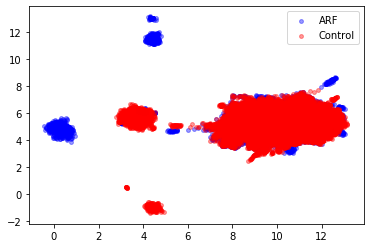

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import umap

umap_extracted_features = umap.UMAP(n_neighbors=11, n_components=11, min_dist=0.99).fit_transform(Total_table)

Figure = plt.figure()

ARF_x = umap_extracted_features[0:len(ARF), 0]
ARF_y = umap_extracted_features[0:len(ARF), 1]
colors = np.array(["Blue"])
plt.scatter(ARF_x, ARF_y, s=15, label='ARF', c=colors, cmap='Paired', alpha=0.4, linewidth=1)

Control_x = umap_extracted_features[len(ARF):, 0]
Control_y = umap_extracted_features[len(ARF):, 1]
colors = np.array(["Red"])
plt.scatter(Control_x, Control_y, s=15, label='Control', c=colors, cmap='Paired', alpha=0.4, linewidth=1)

plt.legend()
plt.savefig('/home/asuri7Control_ARF_ver1.pdf')
plt.show()

In [11]:
import umap
from sklearn.cluster import KMeans

num_clusters = 10

# UMAP for dimensionality reduction
umap_embedding = umap.UMAP(n_neighbors=11, n_components=11, min_dist=0.99).fit_transform(Total_table)
# K-means for clustering
kmeans = KMeans(n_clusters=num_clusters)
# Fit the model to the UMAP-transformed data
kmeans.fit(umap_embedding)
# Obtain the cluster labels for the data points
cluster_labels = kmeans.predict(umap_embedding)

In [12]:
print(cluster_labels)
print(enumerate(cluster_labels))

[2 9 2 ... 2 3 2]


In [13]:
cluster_labels_enum = list(enumerate(cluster_labels))
print(cluster_labels_enum)

[(0, 2), (1, 9), (2, 2), (3, 9), (4, 9), (5, 2), (6, 7), (7, 9), (8, 9), (9, 9), (10, 9), (11, 9), (12, 2), (13, 2), (14, 6), (15, 9), (16, 2), (17, 9), (18, 9), (19, 2), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (25, 7), (26, 9), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 2), (33, 9), (34, 9), (35, 9), (36, 9), (37, 9), (38, 9), (39, 2), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (46, 9), (47, 9), (48, 9), (49, 9), (50, 9), (51, 9), (52, 9), (53, 9), (54, 9), (55, 9), (56, 9), (57, 9), (58, 9), (59, 9), (60, 9), (61, 9), (62, 9), (63, 2), (64, 9), (65, 9), (66, 9), (67, 9), (68, 9), (69, 9), (70, 2), (71, 9), (72, 9), (73, 9), (74, 9), (75, 9), (76, 9), (77, 9), (78, 9), (79, 9), (80, 9), (81, 9), (82, 9), (83, 9), (84, 9), (85, 9), (86, 2), (87, 9), (88, 9), (89, 9), (90, 9), (91, 9), (92, 9), (93, 9), (94, 9), (95, 9), (96, 9), (97, 9), (98, 9), (99, 2), (100, 9), (101, 9), (102, 9), (103, 2), (104, 9), (105, 9), (106, 9), (107, 9), (108, 9), (109, 9), (110, 9),

In [18]:
#GROUPING INDICES WITH THE SAME CLUSTER LABEL TOGETHER 
### 
#Creating a Dict for the labels 
cluster_indices= {} 

#Iterate over the cluster indices and the labels
for index, clusterLab in enumerate(cluster_labels): 
    #Check if the cluser label already exists in the dict 
    if clusterLab in cluster_indices: 
        #If the cluster_label exists then append it 
        cluster_indices[clusterLab].append(index)
    else: 
        #If the the cluster does not exist then create it to a new one 
        cluster_indices[clusterLab]= [index]

# Print out the cluster and the index 
for clusterLab, index in cluster_indices.items(): 
    print(f'cluster label {clusterLab}:{index}')
    

cluster label 2:[0, 2, 5, 12, 13, 16, 19, 32, 39, 63, 70, 86, 99, 103, 113, 133, 150, 249, 279, 280, 281, 283, 288, 301, 304, 305, 306, 307, 308, 309, 310, 311, 313, 314, 315, 316, 317, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 360, 364, 365, 367, 369, 370, 371, 372, 373, 380, 381, 383, 384, 385, 386, 389, 390, 392, 393, 394, 396, 397, 398, 402, 403, 404, 408, 409, 410, 412, 413, 414, 416, 421, 423, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 440, 441, 442, 443, 445, 446, 447, 448, 451, 453, 471, 485, 488, 493, 494, 496, 497, 498, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 511, 512, 513, 514, 515, 516, 519, 521, 522, 525, 529, 533, 535, 537, 544, 549, 551, 554, 556, 557, 558, 560, 571, 574, 576, 578, 580, 584, 589, 594, 599, 600, 603, 604, 605, 607, 610, 614, 616, 618, 621, 622, 624, 625, 628, 629, 630, 634, 635, 636, 641, 642, 643, 644, 647, 648, 650, 653, 654, 655, 657, 658, 659,

In [31]:
### GETTING THE ACTUAL DATA 
# Create an empty dictionary to store data points for each cluster label
cluster_data = {}

# Iterate over the cluster labels and indices
for label, indices in cluster_indices.items():
    # Retrieve the data points for the current cluster label using the indices
    data_points = Total_table.iloc[indices]
    
    # Store the data points in the dictionary with the cluster label as the key
    cluster_data[label] = data_points

# Export data points for each cluster label to separate CSV files
for label, data_points in cluster_data.items():
    filename = f"/home/asuri7/Desktop/cluster_{label}.csv"
    data_points.to_csv(filename, index=True)
    print(f"Cluster Label {label} data has been exported to {filename}")



Cluster Label 2 data has been exported to /home/asuri7/Desktop/cluster_2.csv
Cluster Label 9 data has been exported to /home/asuri7/Desktop/cluster_9.csv
Cluster Label 7 data has been exported to /home/asuri7/Desktop/cluster_7.csv
Cluster Label 6 data has been exported to /home/asuri7/Desktop/cluster_6.csv
Cluster Label 5 data has been exported to /home/asuri7/Desktop/cluster_5.csv
Cluster Label 4 data has been exported to /home/asuri7/Desktop/cluster_4.csv
Cluster Label 8 data has been exported to /home/asuri7/Desktop/cluster_8.csv
Cluster Label 3 data has been exported to /home/asuri7/Desktop/cluster_3.csv
Cluster Label 1 data has been exported to /home/asuri7/Desktop/cluster_1.csv
Cluster Label 0 data has been exported to /home/asuri7/Desktop/cluster_0.csv


In [30]:
import pandas as pd

# Create an empty list to store data frames for each cluster label
cluster_dataframes = []

# Iterate over the cluster labels and indices
for label, indices in cluster_indices.items():
    # Retrieve the data points for the current cluster label using the indices
    data_points = Total_table.iloc[indices]
    
    # Append the data points dataframe to the list
    cluster_dataframes.append(data_points)

# Concatenate the data frames for each cluster label into one dataframe
merged_dataframe = pd.concat(cluster_dataframes)

# Export the merged dataframe to a CSV file
file_location = "/home/asuri7/Desktop/merged_clusters.csv"
merged_dataframe.to_csv(file_location, index=True)
print(f"Merged dataframe has been exported to {file_location}")

print(merged_dataframe)

Merged dataframe has been exported to /home/asuri7/Desktop/merged_clusters.csv
                   NNmean  NNmedian    NNmode  NNvariance    NNskew    NNkurt  \
patID                                                                           
A094-0459925957  454.8006  454.1667  458.3333    440.0168  15.35060  323.2378   
A094-0459925957  469.1285  466.6667  466.6667    455.8774  17.32377  380.5044   
A094-0459925957  467.3672  466.6667  466.6667    522.1083  14.41233  294.4367   
A094-0459925957  458.1165  458.3333  462.5000    432.2254  16.91065  375.3770   
A094-0459925957  460.7349  458.3333  470.8333    405.7419  16.82828  371.4692   
...                   ...       ...       ...         ...       ...       ...   
A071-0453405494    0.0000    0.0000    0.0000      0.0000   0.00000    0.0000   
A071-0453405494    0.0000    0.0000    0.0000      0.0000   0.00000    0.0000   
A071-0453405494    0.0000    0.0000    0.0000      0.0000   0.00000    0.0000   
A071-0453405494    0.0000    0

In [24]:
#Version 2 

# #Patient ID for each cluster 
# # Assuming you have cluster labels stored in a variable called "cluster_labels"
# # Assuming you have patient IDs stored in a variable called "patient_ids"

# # Create a dictionary to store data points for each cluster
# cluster_data = {}

# # Iterate over each data point
# for i, label in enumerate(cluster_labels):
#     # Get the patient ID for the current data point
#     patient_id = patient_ids[i]
    
#     # Add the patient ID to the corresponding cluster's list of data points
#     if label in cluster_data:
#         cluster_data[label].append(patient_id)
#     else:
#         cluster_data[label] = [patient_id]

# # Print the patient IDs for each cluster
# for cluster, data_points in cluster_data.items():
#     print(f"Cluster {cluster}: {data_points}")


NameError: name 'patID' is not defined

In [ ]:
#Version 3, To do 
import umap
umap = umap.UMAP()
umap.fit(Total_table)
data_low_dim = umap.transform(data)
cluster_labels2 = umap.cluster(data_low_dim)
cluster_labels2 = np.unique(cluster_labels)